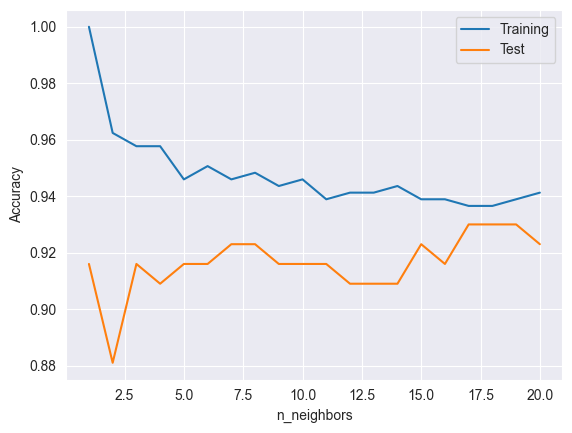

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# 資料集讀取
cancer = load_breast_cancer()

# 分為訓練資料與測試資料
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 0)

# 準備圖形描繪用的list
training_accuracy = []
test_accuracy = []

# 學習
for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))


plt.plot(range(1,21),training_accuracy, label = 'Training')
plt.plot(range(1,21),test_accuracy, label = 'Test')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

#### 練習問題8-6

In [2]:
import pandas as pd
import requests
import io

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

# 將取得的資料作為DataFrame物件讀取
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')),header=None)

# 在資料的行裡設置標籤
mushroom.columns = ['classes','cap_shape','cap_surface','cap_color','odor','bruises',
                    'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                    'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
                    'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                    'ring_number','ring_type','spore_print_color','population','habitat']

mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x:1 if x == 'p' else 0)

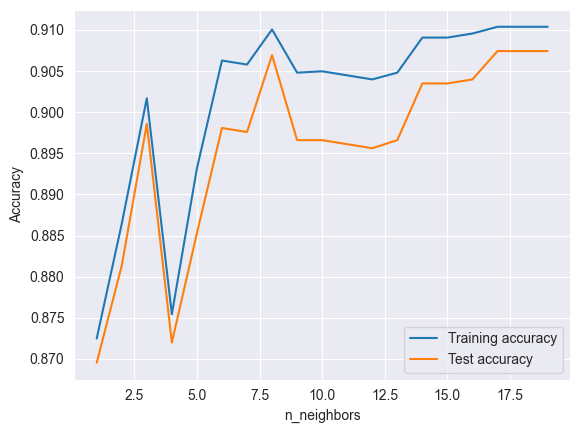

In [19]:
X = mushroom_dummy.drop('flg', axis = 1)
y = mushroom_dummy['flg']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)


# 準備圖形描繪用的list
training_accuracy = []
test_accuracy = []
neighbors_setting = range(1, 20)
# 學習
for n_neighbors in neighbors_setting:
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))


plt.plot(neighbors_setting,training_accuracy, label = 'Training accuracy')
plt.plot(neighbors_setting,test_accuracy, label = 'Test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

#### 練習問題8-7

In [23]:
from sklearn.neighbors import KNeighborsRegressor
student = pd.read_csv('student-mat.csv',sep = ';')
X = student.loc[:, ['age','Medu','Fedu','traveltime','studytime',
                    'failures','famrel','freetime','goout','Dalc','Walc',
                    'absences','G1','G2']].values

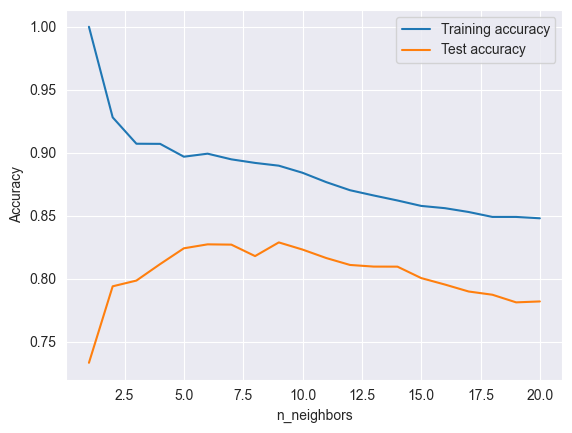

In [29]:
y = student['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


# 準備圖形描繪用的list
scores_train = []
scores_test = []

# 學習
for n_neighbors in range(1,21):
    model = KNeighborsRegressor(n_neighbors = n_neighbors)
    model.fit(X_train, y_train)
    scores_train.append(model.score(X_train, y_train))
    scores_test.append(model.score(X_test, y_test))


plt.plot(range(1,21),scores_train, label = 'Training accuracy')
plt.plot(range(1,21),scores_test, label = 'Test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()